<a href="https://colab.research.google.com/github/sayanbanerjee32/TASI_ERAv2_S10/blob/main/S10_SayanBanerjee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [1]:
%%capture
!pip install torch-lr-finder

In [2]:
%%capture
!git clone https://github.com/sayanbanerjee32/TASI_vision_master.git

# Import all required packages including local files

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms
from torchsummary import summary


import matplotlib.pyplot as plt
import numpy as np

#import from local modules
from TASI_vision_master.datasets.cifar10_dataloader import get_cifar10_data_loader
from TASI_vision_master.train import train_orchestrator, lr_range_test #train, test, checkpoint, resume
from TASI_vision_master.utils import get_device, plot_accuracy_losses, plot_top_loss, plot_image
from TASI_vision_master.models.custom_resnet_s10 import Net

# Check if GPU available

In [4]:
# CUDA? - call get_device function defined in utils.py
is_cuda, device = get_device()

CUDA Available? True


# Dataloader Arguments & Test/Train Dataloaders

In [5]:
# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if is_cuda else dict(shuffle=True, batch_size=64)

train_loader = get_cifar10_data_loader(dataloader_args = dataloader_args)
test_loader = get_cifar10_data_loader(dataloader_args = dataloader_args, is_train = False)

class_labels = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:03<00:00, 45393357.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


### Augmented data visualization

In [6]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([512, 3, 32, 32])
torch.Size([512])


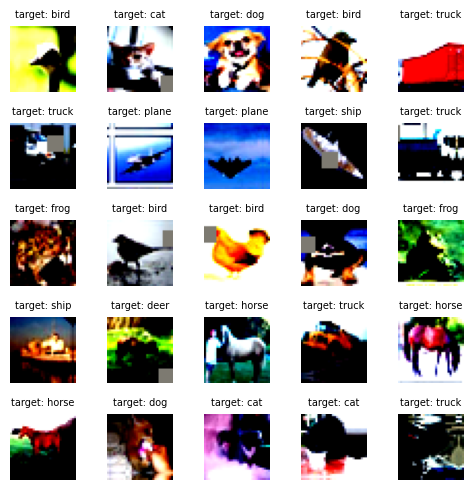

In [7]:
plot_image(images, [class_labels[l] for l in labels])

# Training

In [8]:
# visualise model parameters
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,728
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.54E-03


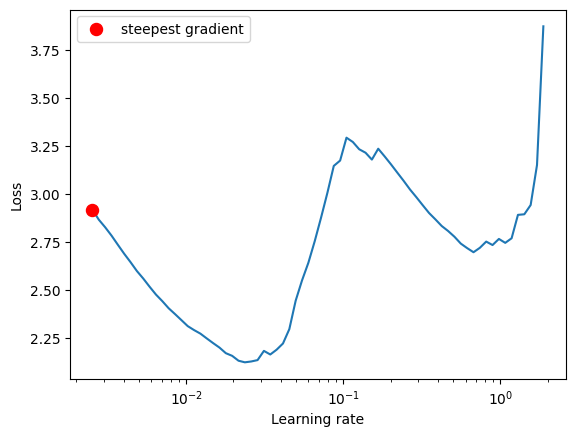

In [9]:
## LR range test
optimizer = optim.Adam(model.parameters(), lr=0.001) # use of weight_decay = 0.01 is impacting test accuracy
criterion = F.cross_entropy
lr_range_test(model, optimizer, criterion, train_loader, device)

In [10]:
## train model
num_epochs = 24
LRMAX = 2.54E-03
LRMIN = LRMAX/10
scheduler = optim.lr_scheduler.OneCycleLR(optimizer  = optimizer, max_lr = LRMAX,
                                          anneal_strategy = 'linear',
                                          pct_start=0.21, div_factor=10,final_div_factor = 1,
                                          steps_per_epoch=len(train_loader), epochs=num_epochs,
                                          three_phase = False)

train_history_dict = train_orchestrator(model, device, train_loader, test_loader,
                                        criterion, optimizer, scheduler,
                                        learning_rate = LRMIN, num_epochs = num_epochs)

Epoch 1


Train: Loss=1.1835 Batch_id=97 Accuracy=46.60: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s]


Test set: Average loss: 1.1785, Accuracy: 5866/10000 (58.66%)

Learning rate updated to: 0.0007084916010711678
Epoch 2


Train: Loss=0.8248 Batch_id=97 Accuracy=66.30: 100%|██████████| 98/98 [00:19<00:00,  5.12it/s]


Test set: Average loss: 0.8198, Accuracy: 7161/10000 (71.61%)

Learning rate updated to: 0.0011629832021423357
Epoch 3


Train: Loss=0.7457 Batch_id=97 Accuracy=75.14: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]


Test set: Average loss: 0.7602, Accuracy: 7420/10000 (74.20%)

Learning rate updated to: 0.0016174748032135033
Epoch 4


Train: Loss=0.5918 Batch_id=97 Accuracy=79.42: 100%|██████████| 98/98 [00:19<00:00,  5.10it/s]


Test set: Average loss: 0.6295, Accuracy: 7849/10000 (78.49%)

Learning rate updated to: 0.0020719664042846715
Epoch 5


Train: Loss=0.5559 Batch_id=97 Accuracy=81.93: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]


Test set: Average loss: 0.5672, Accuracy: 8065/10000 (80.65%)

Learning rate updated to: 0.002526458005355839
Epoch 6


Train: Loss=0.4397 Batch_id=97 Accuracy=84.19: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]


Test set: Average loss: 0.4648, Accuracy: 8404/10000 (84.04%)

Learning rate updated to: 0.0024230228623094807
Epoch 7


Train: Loss=0.3064 Batch_id=97 Accuracy=86.55: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]


Test set: Average loss: 0.3954, Accuracy: 8654/10000 (86.54%)

Learning rate updated to: 0.0023024532420563163
Epoch 8


Train: Loss=0.2824 Batch_id=97 Accuracy=88.08: 100%|██████████| 98/98 [00:19<00:00,  4.96it/s]


Test set: Average loss: 0.4470, Accuracy: 8490/10000 (84.90%)

Learning rate updated to: 0.002181883621803152
Epoch 9


Train: Loss=0.3111 Batch_id=97 Accuracy=89.25: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]


Test set: Average loss: 0.3975, Accuracy: 8700/10000 (87.00%)

Learning rate updated to: 0.002061314001549987
Epoch 10


Train: Loss=0.2562 Batch_id=97 Accuracy=90.80: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]


Test set: Average loss: 0.3499, Accuracy: 8795/10000 (87.95%)

Learning rate updated to: 0.0019407443812968226
Epoch 11


Train: Loss=0.2110 Batch_id=97 Accuracy=91.47: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.3658, Accuracy: 8823/10000 (88.23%)

Learning rate updated to: 0.0018201747610436581
Epoch 12


Train: Loss=0.1892 Batch_id=97 Accuracy=92.19: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]


Test set: Average loss: 0.3425, Accuracy: 8892/10000 (88.92%)

Learning rate updated to: 0.0016996051407904933
Epoch 13


Train: Loss=0.1777 Batch_id=97 Accuracy=93.28: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]


Test set: Average loss: 0.3094, Accuracy: 8991/10000 (89.91%)

Learning rate updated to: 0.0015790355205373289
Epoch 14


Train: Loss=0.1415 Batch_id=97 Accuracy=93.82: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]


Test set: Average loss: 0.3016, Accuracy: 9027/10000 (90.27%)

Learning rate updated to: 0.0014584659002841642
Epoch 15


Train: Loss=0.1831 Batch_id=97 Accuracy=94.37: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]


Test set: Average loss: 0.3128, Accuracy: 9004/10000 (90.04%)

Learning rate updated to: 0.0013378962800309996
Epoch 16


Train: Loss=0.1581 Batch_id=97 Accuracy=94.79: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]


Test set: Average loss: 0.2806, Accuracy: 9090/10000 (90.90%)

Learning rate updated to: 0.0012173266597778354
Epoch 17


Train: Loss=0.1475 Batch_id=97 Accuracy=95.37: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]


Test set: Average loss: 0.2697, Accuracy: 9140/10000 (91.40%)

Learning rate updated to: 0.0010967570395246707
Epoch 18


Train: Loss=0.0944 Batch_id=97 Accuracy=95.92: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.2813, Accuracy: 9134/10000 (91.34%)

Learning rate updated to: 0.0009761874192715061
Epoch 19


Train: Loss=0.0959 Batch_id=97 Accuracy=96.58: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]


Test set: Average loss: 0.2649, Accuracy: 9166/10000 (91.66%)

Learning rate updated to: 0.0008556177990183414
Epoch 20


Train: Loss=0.0834 Batch_id=97 Accuracy=96.84: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.2522, Accuracy: 9201/10000 (92.01%)

Learning rate updated to: 0.000735048178765177
Epoch 21


Train: Loss=0.0794 Batch_id=97 Accuracy=97.13: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]


Test set: Average loss: 0.2447, Accuracy: 9246/10000 (92.46%)

Learning rate updated to: 0.0006144785585120124
Epoch 22


Train: Loss=0.0701 Batch_id=97 Accuracy=97.59: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]


Test set: Average loss: 0.2457, Accuracy: 9249/10000 (92.49%)

Learning rate updated to: 0.0004939089382588477
Epoch 23


Train: Loss=0.0613 Batch_id=97 Accuracy=97.78: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.2412, Accuracy: 9261/10000 (92.61%)

Learning rate updated to: 0.0003733393180056833
Epoch 24


Train: Loss=0.0445 Batch_id=97 Accuracy=98.13: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.2370, Accuracy: 9305/10000 (93.05%)

Learning rate updated to: 0.00025276969775251887


In [11]:
# final learning rate
scheduler.get_last_lr()

[0.00025276969775251887]

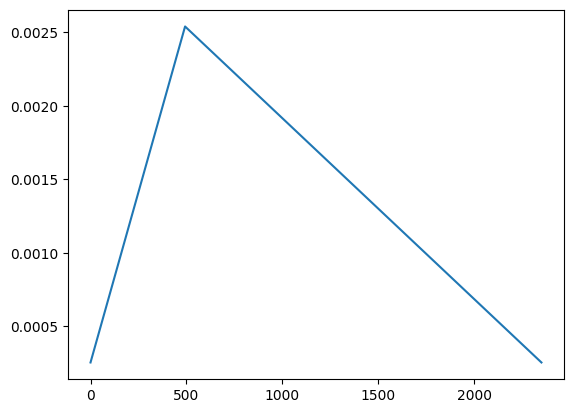

In [12]:
# lr update history
plt.plot(train_history_dict['lr_list'])

## Visualise training and test losses and accuracies

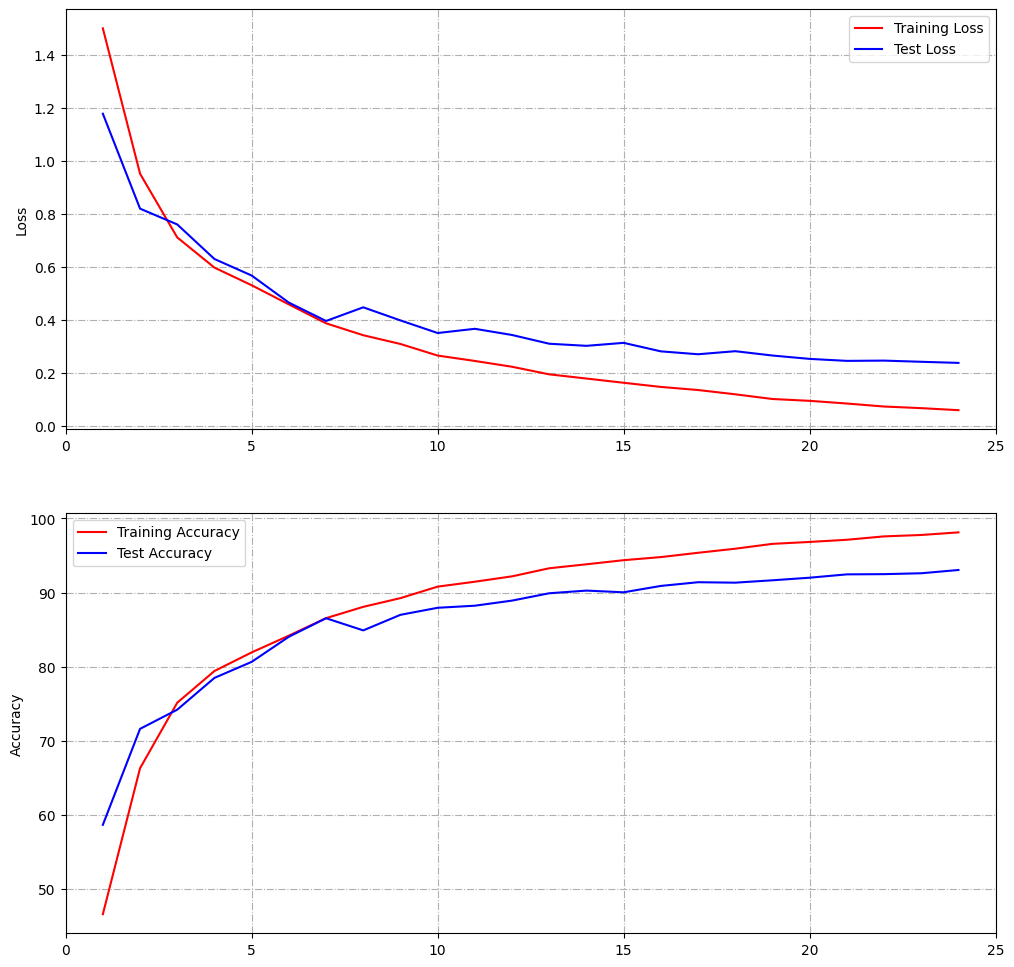

In [13]:
## use function from utils.py
plot_accuracy_losses(train_history_dict['train_losses'],
                     train_history_dict['train_acc'],
                     train_history_dict['test_losses'],
                     train_history_dict['test_acc'],
                     train_history_dict['best_epoch'])

## Error analysis

total wrong predictions: 695


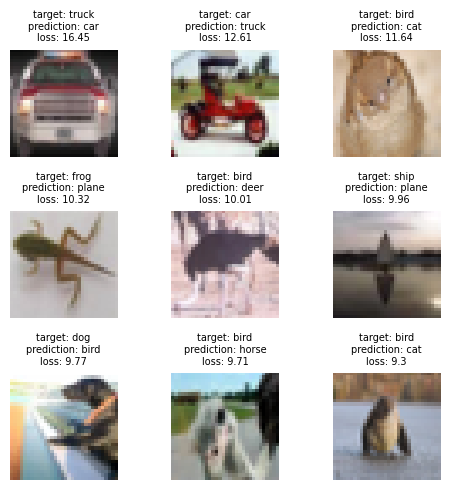

In [14]:
## top test images with large losses
incr_groups_df = plot_top_loss(model, device, test_loader, criterion,
                               label_names = class_labels, img_rows=3, img_cols = 3)

In [15]:
## most confusing combinations
incr_groups_df.loc[incr_groups_df.image > 1]

,target,prediction,loss,image
28,dog,cat,2.024010,66
15,cat,dog,2.094069,57
63,truck,car,2.761228,28
14,cat,deer,1.893679,28
16,cat,frog,2.191775,26
60,ship,plane,2.400734,26
1,bird,deer,2.793388,23
5,bird,plane,2.531160,23
29,dog,deer,3.281860,22
22,deer,cat,1.660485,21
